<a href="https://colab.research.google.com/github/vanle2000/Data-Science-Salary-prediction/blob/main/Data_Sciece_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns 
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


`ds_salaries.csv` dataset 11 variables: 
* `work_year`: Salary payment year
* `experience_level`: Experience level at the job during the year
* `employment_type`: Type of employement
* `job_title`: Job role during the year
* `salary`: Total gross salary amount
* `salary_currency`: Currency of salary, paid as an ISO 4217 currency code
* `salary_in_usd`: Salary in USD
* `employee_residence`: Employee's primary country of residence, as an ISO 3166 country code
* `remote_ratio`: Overall amount of work done remotely
* `company_location`: Country of employer's main office or contracting branch, as an ISO 3166 country code
* `company_size`: Amount of people worked for the company

# 1. Data Preprocessing and EDA:

In [3]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Since there are no missing values (all counts are 0), `ds_salaries.csv` dataset seems to be clean and complete in terms of missing data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Drop `salary_currency` and `salary` since we will use `salary_in_usd` only.

In [5]:
df = df.drop('salary', axis=1, inplace=False)
df = df.drop('salary_currency', axis=1, inplace=False)

## 1.1. Feature Engineering


### 1.1.1. Job Title:

In [6]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

Recategorize job title into 6 categories: Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, Applied Research Scientist, Other. 

In [7]:
def title_group(title):
  data_scientist_title = ['Data Scientist', 'Lead Data Scientist', 'Director of Data Science', 'Data Science Manager', 'Head of Data',
                          'AI Scientist', 'Principal Data Scientist', 'Head of Data Science', 'Staff Data Scientist']

  data_engineer_title = ['Big Data Engineer', 'Lead Data Engineer', 'Data Engineer', 'Data Engineering Manager', 'Cloud Data Engineer',
                         'Data Architect', 'Director of Data Engineering', 'Principal Data Engineer',  'Big Data Architect', 'ETL Developer',
                         'Data Science Engineer']

  data_analyst_title = ['Product Data Analyst', 'Data Analyst', 'Business Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Data Analytics Manager'
                        'Financial Data Analyst',  'Marketing Data Analyst', 'Data Analytics Engineer', 'Data Analytics Lead', 'Finance Data Analyst', 
                        'Principal Data Analyst', 'Analytics Engineer']

  mle_title = ['Machine Learning Engineer', 'Machine Learning Manager', 'ML Engineer', 'Computer Vision Engineer', 'Lead Machine Learning Engineer',  
               'Machine Learning Infrastructure Engineer', 'Machine Learning Developer', 'Head of Machine Learning', 'NLP Engineer',
               'Computer Vision Software Engineer']

  research_scientist_title = ['Machine Learning Scientist', 'Research Scientist', '3D Computer Vision Researcher', 'Applied Data Scientist',
                                'Applied Machine Learning Scientist']
                      
  others = ['Data Science Consultant', 'Data Specialist']

  if title in data_scientist_title:
    return 'Data Scientist'

  elif title in data_engineer_title:
    return 'Data Engineer'

  elif title in data_analyst_title:
    return 'Data Analyst'

  elif title in mle_title:
    return 'MLE'
  
  elif title in research_scientist_title:
    return 'Applied Research Scientist'
  
  else:
    return 'Others'
    

In [8]:
df['job_title'] = df['job_title'].apply(title_group)
df['job_title'].value_counts()

Data Scientist                189
Data Engineer                 175
Data Analyst                  126
MLE                            66
Applied Research Scientist     34
Others                         17
Name: job_title, dtype: int64

Text(0, 0.5, 'Number of Job Postings')

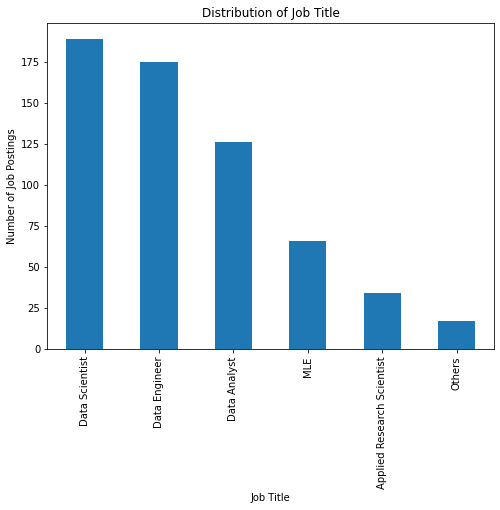

In [9]:
plt.figure(figsize=(8,6))
df['job_title'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Job Postings')

### 1.1.2. Residency:


In [10]:
df['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [11]:
def categorize_region(residency):
  Europe = ['DE', 'GB', 'HU', 'FR', 'PL', 'PT', 'GR', 'NL', 'AT', 'ES', 'DK', 'IT', 'HR', 
            'BG', 'BE', 'UA', 'MT', 'RO', 'SI', 'RS', 'LU', 'JE', 'CZ', 'IE', 'CH']
  North_America = ['US', 'MX', 'CA']
  South_America = ['HN', 'BR', 'AR', 'BO', 'CO', 'PR']
  Asia = ['JP', 'IN', 'PK', 'CN', 'AE', 'SG', 'VN', 'HK', 'TR', 'MY']
  Australia = ['NZ', 'AU']
  Africa = ['NG', 'TN', 'KE', 'DZ']

  if residency in Europe:
    return 'Europe'
  elif residency in North_America:
    return 'North America'
  elif residency in South_America:
    return 'South America'
  elif residency in Asia:
    return 'Asia'
  elif residency in Australia:
    return 'Australia'
  else: 
    return 'Africa'

In [12]:
df['continent'] = df['employee_residence'].apply(categorize_region)
df.drop('employee_residence', axis=1, inplace=True)

Create box plot to observe the distribution based on continents:

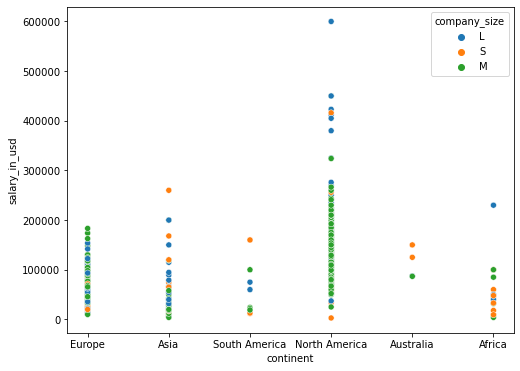

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='continent', y='salary_in_usd', hue= 'company_size')
plt.show()

### 1.1.3. Company Location:

In [14]:
df['company_location'] = df['company_location'].apply(categorize_region)

<AxesSubplot:>

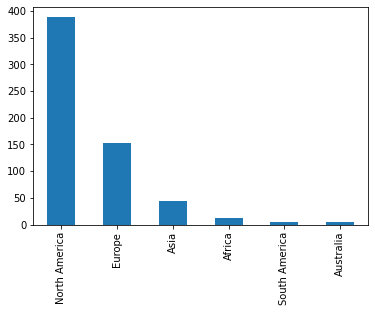

In [15]:
df['company_location'].value_counts().plot(kind='bar')

### 1.1.4. Employment Type:

In [16]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

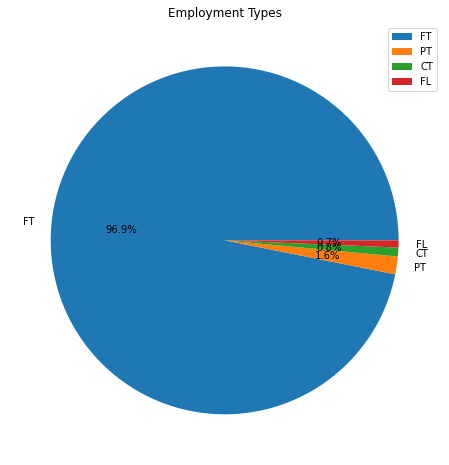

In [17]:
employment_counts = df['employment_type'].value_counts()

# Create a pie chart with the percentages
plt.figure(figsize=(12, 8))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%')
plt.legend()
plt.title('Employment Types')
plt.show()

Let's create a line plot to visualize the relationship between salaries in USD for different data positions over multiple work years. 

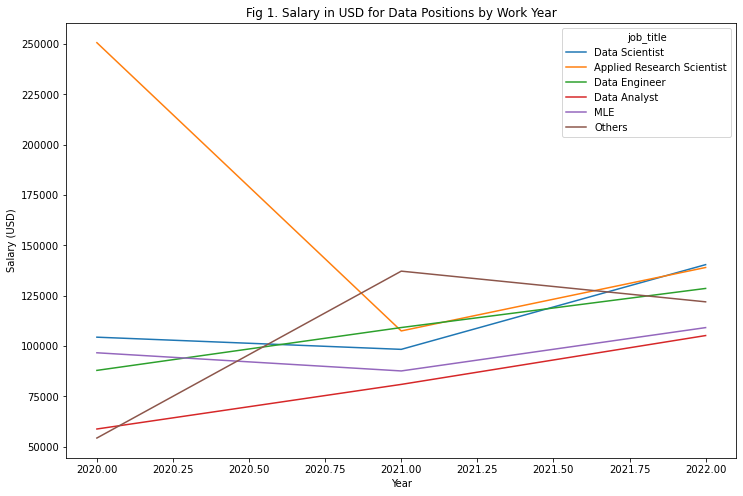

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df, ci=None)
plt.title('Fig 1. Salary in USD for Data Positions by Work Year')
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.show()

### Year 2020:

- Applied Research Scientists held a prominent position, earning roughly double the salaries of Data Scientists, Data Engineers, and Machine Learning Engineers. Their salaries stood at an impressive 250,000, while others averaged around 50,000 to 60,000.
- Data Analysts lagged behind in earnings, with salaries roughly five times lower than those of Applied Research Scientists.

### Year 2021:

- Substantial shifts in salary dynamics occurred. Applied Research Scientists saw their incomes plummet by nearly half, closely approaching the compensation of Data Engineers.
- Data Scientists and Machine Learning Engineers experienced slight declines in their earnings but maintained relatively high salaries, hovering at approximately 100,000 annually.
- Data Analysts witnessed a significant reduction in their salaries, closing the gap between them and Applied Research Scientists.

### Year 2022:

- The salary landscape continued to evolve. Salaries for Machine Learning Engineers and Data Analysts dropped further, stabilizing at around 90,000 per annum.
- Data Scientists, Data Engineers, and Applied Research Scientists maintained relatively consistent salaries, all averaging approximately 125,000 annually.

## 1.2. Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

for col in df:
  if col in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    # Fit and transform 
    df[col] = encoder.fit_transform(df[col])

    print(f"{col}: {df[col].unique()}")

df.head()

experience_level: [2 3 0 1]
employment_type: [2 0 3 1]
job_title: [3 0 2 1 4 5]
company_location: [3 1 5 4 2 0]
company_size: [0 2 1]
continent: [3 1 5 4 2 0]


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,continent
0,0,2020,2,2,3,79833,0,3,0,3
1,1,2020,3,2,0,260000,0,1,2,1
2,2,2020,3,2,2,109024,50,3,1,3
3,3,2020,2,2,1,20000,0,5,2,5
4,4,2020,3,2,4,150000,50,4,0,4


## 1.3. EDA

<AxesSubplot:>

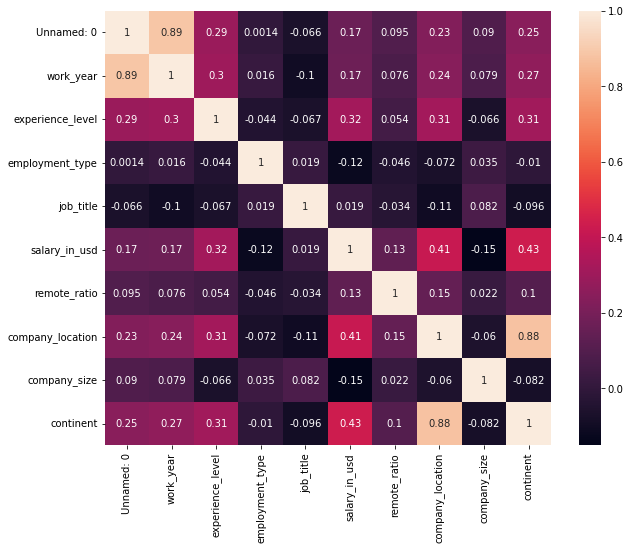

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2g')

The heat-map correlation reveals strong positive correlations between data scientist salaries and key variables such as `work_year`, `experience_level`, `company_location` and `continent`. Given these findings, a regression model is suitable for predicting salaries based on these factors. I think a Linear Regression model would be a straightforward choice for this task, providing a clear understanding of how these variables influence salaries in the field of data science.

Now, we can visualize to see how different categorical variables relate to the `salary_in_usd`, helping us understand how each feature impacts salary in our dataset.

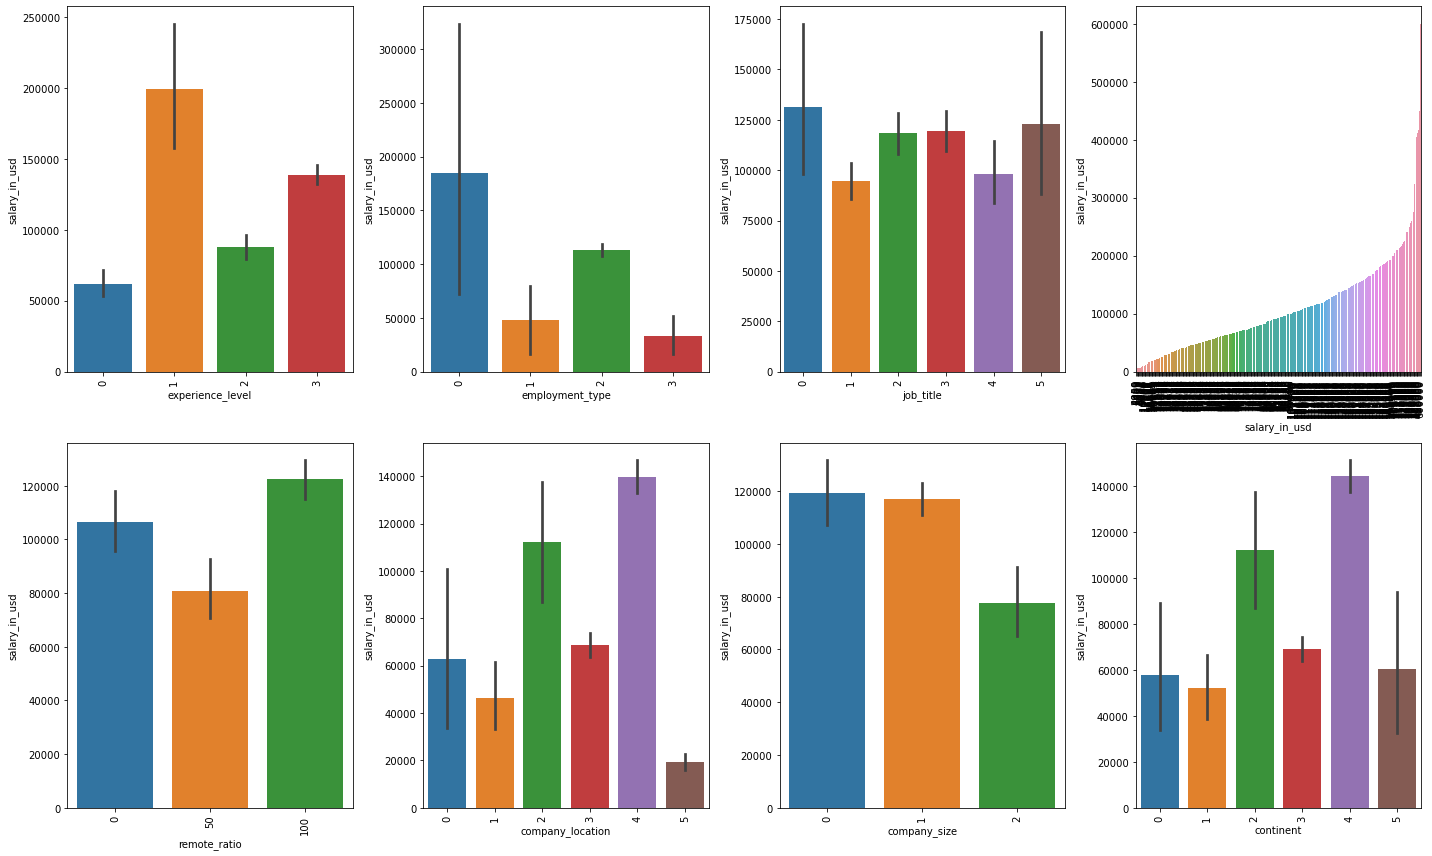

In [21]:
cat_vars = ['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
            'remote_ratio', 'company_location', 'company_size', 'continent'] 
        
fig, ax = subplots(figsize=(20, 12), nrows=2, ncols=4)
ax = ax.flatten()

for i, var in enumerate(cat_vars):
  sns.barplot(data=df, x=var, y='salary_in_usd', ax=ax[i], estimator=np.mean)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

# 2. Prediction Models:

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, accuracy_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score

## 2.1. Train Test Split:

In [39]:
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

## 2.2. Model Selection:

### 2.2.1. Multilinear Regression - Baseline model:

In [40]:
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred_ml = ml.predict(X_test)

# np.mean(cross_val_score(ml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv =3))

### 2.2.2. Decision Tree Regressor: 

In [41]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

# param_grid = {
#     'max_depth': [2,4,6,8,10],
#     'min_samples_split': [2,4,6,8,10],
#     'min_samples_leaf': [1,2,3,4,5],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(dt, 
#                            param_grid, 
#                            cv=5, 
#                            scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)

### 2.2.3. Random Forest Regressor:

In [42]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error' ,cv=3))

-42037.70390653614

### 2.2.4. Gradient Boosting Regressor:

In [43]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

## 2.3. Model Evaluation:

In [44]:
# Evaluate the models
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{name} Metrics:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("-" * 50)

In [45]:
evaluate_model("Multilinear Regression", y_test, y_pred_ml)
evaluate_model("Decision Tree Regressor", y_test, y_pred_dt)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)
evaluate_model("Gradient Boosting Regressor", y_test, y_pred_gb)

Multilinear Regression Metrics:
Mean Squared Error: 3281367031.15
Root Mean Squared Error: 57283.22
Mean Absolute Error: 37236.07
R-squared: 0.30
--------------------------------------------------
Decision Tree Regressor Metrics:
Mean Squared Error: 3506317180.71
Root Mean Squared Error: 59214.16
Mean Absolute Error: 42309.34
R-squared: 0.25
--------------------------------------------------
Random Forest Regressor Metrics:
Mean Squared Error: 2464495712.41
Root Mean Squared Error: 49643.69
Mean Absolute Error: 34624.91
R-squared: 0.47
--------------------------------------------------
Gradient Boosting Regressor Metrics:
Mean Squared Error: 2737440357.63
Root Mean Squared Error: 52320.55
Mean Absolute Error: 35121.00
R-squared: 0.42
--------------------------------------------------


## 2.3. Hyperparameter Tuning:

In [46]:
# tune models Gridsearch
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv =3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=70, random_state=42)

In [51]:
!pip install xgboost
import xgboost
from xgboost import XGBRegressor 

In [54]:
# Instanciate a XGBRegressor
xgb = XGBRegressor()

# Set parameters for a GridSearch
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7, 9],
              'n_estimators': [1000]}

# Define settings for our GridSearch of model hyperparameters
xgb_gridSearch = GridSearchCV(xgb,
                              parameters,
                              cv = 3,
                              n_jobs = -1,
                              verbose=0)

# Fit the GridSearch to our training data
xgb_gridSearch.fit(X_train, y_train)

# Find the best parameters from the GridSearch
xgb_cv = (xgb_gridSearch.best_estimator_)

# Fit the model with the best parameters to our train data
fit_model = xgb_cv.fit(X_train,
                       y_train,
                       eval_set=X_val,
                       eval_metric='mae',
                       early_stopping_rounds=50,
                       verbose=False)

NameError: name 'X_val' is not defined

In [55]:
# Calculate model performance for the best model
eval_set = [(X_train, y_train), (X_val, y_val)]
print("MAE:", mean_absolute_error(y_val, fit_model.predict(X_val)))
print("MSE:", mean_squared_error(y_val, fit_model.predict(X_val)))
print("R2:", r2_score(y_val, fit_model.predict(X_val)))

# Save the best performing model
fit_model.save_model('xgb_model.json')
view raw

SyntaxError: invalid syntax (2806770639.py, line 9)

In [56]:
# Import require libraries
import xgboost as xgb
import streamlit as st

# Loading up the Regression model we created
model = xgb.XGBRegressor()
model.load_model("xgb_model.json")

# Caching the model for faster loading
@st.cache_data

# Define the function predict, which is called in the Streamlit interface
def predict(
    job_title,
    most_used_tool,
    people_employed,
    sector,
    region,
    edu_background,
    edu_level,
    years_experience,
):
    # Call model.predict on the Streamlit inputs 
    prediction = model.predict(
        pd.DataFrame(
            data={
                "job_title": job_title,
                "people_employed": people_employed,
                "sector": sector,
                "region": region,
                "edu_background": edu_background,
                "edu_level": edu_level,
                "years_experience": years_experience,
                "tool_Adv": tool_Adv,
                "tool_Hig": tool_Hig,
                "tool_Que": tool_Que,
                "tool_Mid": tool_Mid,
                "tool_Aut": tool_Aut,
            },
            index=[0],
        )
    )
    # Return the final model prediction
    return prediction
view raw

SyntaxError: invalid syntax (2111634846.py, line 45)

In [57]:
# Encode Streamlit interface inputs to match model features
if job_title == "Machine Learning Engineer/Specialist":
    job_title = 2
elif job_title == "Data Analyst":
    job_title = 0
elif job_title == "Data Scientist":
    job_title = 1

NameError: name 'job_title' is not defined

In [58]:
# Set Streamlit title, image and header for the Streamlit app interface
st.title("Danish Data Science Salary Predictor")
st.image(
    """https://builtin.com/cdn-cgi/image/f=auto,quality=80,width=752,height=435/https://builtin.com/sites/www.builtin.com/files/styles/byline_image/public/2021-12/machine-learning-examples-applications.png"""
)
st.header("Enter the candidate information:")

# Create a box to recieve input from the Streamlit app
job_title = st.selectbox(
    "What job title best reflects your daily work?",
    [
        "Machine Learning Engineer/Specialist",
        "Data Scientist",
        "Data Analyst",
    ],
)

# If the button 'Predict Salary' is pressed on the Streamlit app interface,
# the features are sent to the model, a prediction is made and if succesfull,
# the price is returned and displayed
if st.button("Predict Salary"):
    price = predict(
        job_title,
        most_used_tool,
        people_employed,
        sector,
        region,
        edu_background,
        edu_level,
        years_experience,
    )
    st.success(f"The predicted salary for the candidate is {price[0]:.2f} DKK")

NameError: name 'st' is not defined